# Dimensionality Reduction

### What is Dimensionality Reduction?
- Dimensionality reduction is a method for representing a given dataset using a lower number of features (i.e. dimensions) while still capturing the original data's meaningful properties.
- The reason we do this is to remove irrelevant or redundant features, or simply noisy data, to create a model with a lower number of variables.

### Word Bank
- ***Features***: They are often called variables and refer to the individual measureable properties or characteristics of the data. For example in a dataset about cars, features could be attributes like engine size, horesepower, weight, fuel efficiencey, anything measureable.

- ***Noisy data***: Irrelevant, random, or erroneous information that obscures the underlying patters or relationships in the dataset.

### Why do we use Dimensionality Reduction? 
It is used for several reasons in data analysis and machine learning, but it is primarily used to simplify data.
### Key Reasons
1. ***Reducing Overfitting***: In high-dimensional datasets, models try to overfit data because they want to try to fit the noisy data, which causes the underlying patterns of the dataset to be lost.

2. ***Improving Model Performance***: Reducing the number of features can lead to faster and more efficient machine learning algorithms.

3. ***Easier Data Visualization***: It is hard to visualize data with more than 3 features(dimensions), and reducing the demensions makes it easier to explore visual patterns.

4. ***Noise Reduction***: Removes a lot of noisy data, to focus on only the important data points.

5. ***The Curse of Dimensionality***: As the amount of features grows, the amount of data to ensure the data set is reliable grows exponentialy. This requires more space.



### Types of Dimensionality Reduction:

### Principal Component Analysis (PCA)
- The most common dimensionality reduction method.
- It combines and transforms the data set's feature to produce new features.
- These are called principal components.
- The principal components together comprise the majority or all the variance present in the original data set.
- PCA then projects data onto a new space defined by these new features.
- Focuses on data variance
###  
***Example***:
- We have a dataset about snakes with four variables:   
    - body length (X1), 
    - body diameter at widest point (X2) 
    - fang length (X3), 
    - weight (X4), 
    - age (X5). 
###  
Of course, some of these five features may be correlated, such as body length, diameter, and weight.

By reducing these data points we can create a data set with less vairables.

In [1]:
 #%% pip3 install -U scikit-learn # Get the datasets

In [2]:
# Import necessary libraries
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

In [3]:
#Load the Dataset
iris = datasets.load_iris()
#convert the dataset into a pandas data frame
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
#display the head (first 5 rows) of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
#Standardize the features
#Create an object of StandardScaler which is present in sklearn.preprocessing
scalar = StandardScaler() 
scaled_data = pd.DataFrame(scalar.fit_transform(df)) #scaling the data
scaled_data

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [5]:
#Applying PCA
#Taking no. of Principal Components as 3
pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()

,PC1,PC2,PC3
0,-2.264703,0.480027,0.127706
1,-2.080961,-0.674134,0.234609
2,-2.364229,-0.341908,-0.044201
3,-2.299384,-0.597395,-0.091290
4,-2.389842,0.646835,-0.015738


<Axes: >

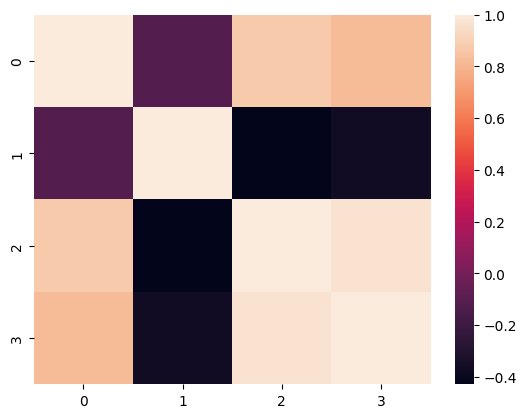

In [6]:
#Check the Co-relation between features without PCA
sns.heatmap(scaled_data.corr())

<Axes: >

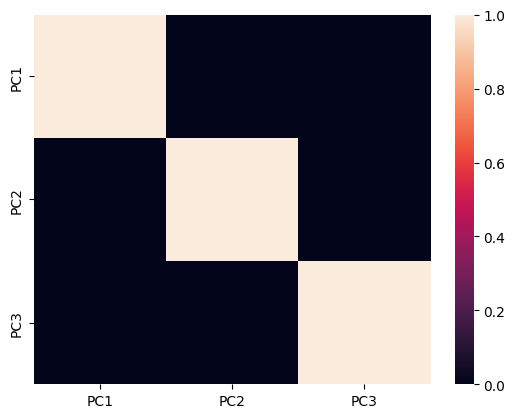

In [7]:
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())

### Linear Discriminant Analysis (LDA)

- LDA is similar to PCA as the new features are derived from the initial model. 
### 
- However, LDA is different as it focuses not only on data variance but class difference as well.
## 
- One goal of LDA is to maximize interclass difference while minimizing intraclass difference.
#
- Otherwise LDA is almost the same as PCA

We need plotly to create the graph

In [8]:
# %% pip3 install plotly

Here we import the libaries and the data set.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import load_wine
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Defining the inputs X and target y variables.  Then, we must fix the number of samples, the number of features, and the number of components, which should respect a specific condition:

In [10]:
X = wine.data.astype('float32')
y = wine.target
n_samples, n_features = X.shape
classes = np.unique(y)
n_classes = len(classes)
n_components = 2
max_components = min(n_classes-1,n_features)
print("Number of classes: {}".format(n_classes))
print("Number of features: {}".format(n_features))
if n_components > max_components:
   raise ValueError("the number of components cannot be larger than min(n_features,n_classes-1)")

Number of classes: 3
Number of features: 13


Calculating the between-class and within-class variance

In [11]:
mean = np.mean(X,axis=0)
Sw = np.zeros((n_features,n_features))
Sb = np.zeros((n_features,n_features))
for c in classes:
   Xc = X[y==c]
   class_means = np.mean(Xc,axis=0)
   #within-class variance
   Sw += (Xc-class_means).T.dot(Xc-class_means)
   mean_diff = (class_means-mean).reshape(n_features,1)
   #between-class variance
   Sb += n_classes * (mean_diff).dot(mean_diff.T)

Once we’ve obtained the 2 crucial matrices, we can finally compute the eigenvectors and the corresponding eigenvalues:

In [12]:
A = np.linalg.inv(Sw).dot(Sb)
eigen_values, eigen_vectors = np.linalg.eig(A) 
eigen_vectors = eigen_vectors.T

We can arrange the eigenvalues in decreasing order and, later, select k eigenvectors with the largest eigenvalues. In this case, we’ll go with k=2, which corresponds to the number of components we want to select:

In [13]:
sorted_idxs = np.argsort(abs(eigen_values))[::-1] 
eigen_values,eigen_vectors = eigen_values[sorted_idxs],eigen_vectors[sorted_idxs]
linear_discriminants = eigen_vectors[0:n_components]

Let’s also obtain the explained variance ratio from each component. It indicates the amount of variance each component of LDA holds after projecting the original data into the two-dimensional space:

In [14]:
explained_variance_ratio = np.sort(eigen_values / np.sum(eigen_values))[::-1][:max_components]
print(explained_variance_ratio)

[0.72817751 0.27182251]


We can compute the new features by multiplying the k dimensional matrix obtained in the previous step with the original data matrix:

In [15]:
X_lda = np.dot(X,linear_discriminants.T)
X_lda_df = pd.DataFrame({'LDA_1':X_lda[:,0],'LDA_2':X_lda[:,1]})
X_lda_df['target'] = y
X_lda_df['target'] = X_lda_df['target'].apply(lambda y: str(y))
fig = px.scatter(X_lda_df, x='LDA_1', y='LDA_2', color=X_lda_df.target,labels={'0': 'LDA 1', '1': 'LDA 2'})


In [16]:
fig.show()

## Sources
- https://www.ibm.com/topics/dimensionality-reduction#:~:text=Dimensionality%20reduction%20is%20a%20method,a%20lower%20number%20of%20variables
## 
- https://en.wikipedia.org/wiki/Dimensionality_reduction 
##
- https://www.geeksforgeeks.org/reduce-data-dimentionality-using-pca-python/
## 
- https://365datascience.com/tutorials/python-tutorials/lda-python/ 
